Wavenumbers estimates for the eight largest spectral peak:
Wavenumber: 750.43, Intensity: 15275.06
Wavenumber: 1250.89, Intensity: 5203.31
Wavenumber: 2975.92, Intensity: 4767.23
Wavenumber: 1031.96, Intensity: 3351.59
Wavenumber: 1427.29, Intensity: 3219.41
Wavenumber: 3184.21, Intensity: 1359.35
Wavenumber: 579.54, Intensity: 1014.52
Wavenumber: 877.21, Intensity: 668.68


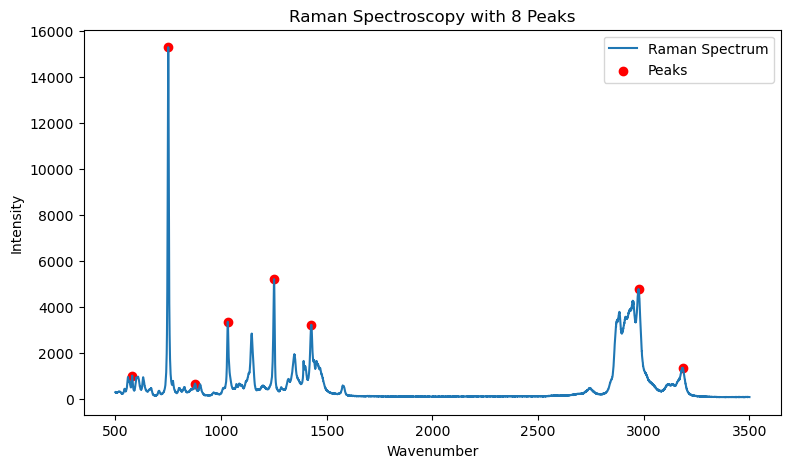

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import CubicSpline

# Load the gata 
Raman_data = np.loadtxt('raman.txt')

# split the data
wavenumber = Raman_data[:, 0]
intensity = Raman_data[:, 1]
# find peaks in intensity data
peaks, _ = find_peaks(intensity, height = 470, distance = 300, prominence=100)
# Extract wavenumber and intensity of the peaks
peak_wavenumber = wavenumber[peaks]
peak_intensity = intensity[peaks]
# Sort by intensity (largest first) and select 8 largest spectral peaks
sorted_indices = np.argsort(peak_intensity)[::-1][:8]
top_wavenumber = peak_wavenumber[sorted_indices]
top_intensity = peak_intensity[sorted_indices]
# Print the wavenumber estimates for the eight largest spectral peak
print("Wavenumbers estimates for the eight largest spectral peak:")
for wn, intens in zip(top_wavenumber, top_intensity):
    print(f"Wavenumber: {wn:.2f}, Intensity: {intens:.2f}")

plt.figure(figsize=(9, 5))
plt.plot(wavenumber, intensity, label='Raman Spectrum')
plt.scatter(top_wavenumber, top_intensity, color='red', label='Peaks')
plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.title('Raman Spectroscopy with 8 Peaks')
plt.legend()
plt.show()

Peak Wavenumber: 750.2207944723618


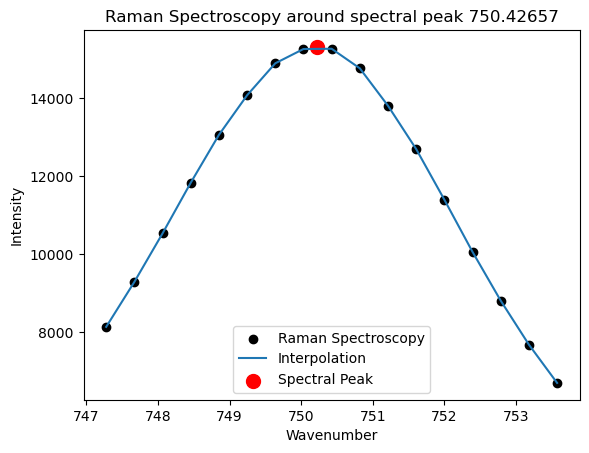

Peak Wavenumber: 1251.0383055276382


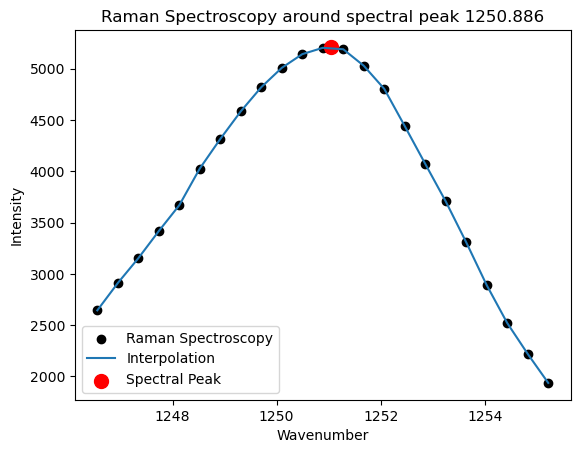

Peak Wavenumber: 2974.680866834171


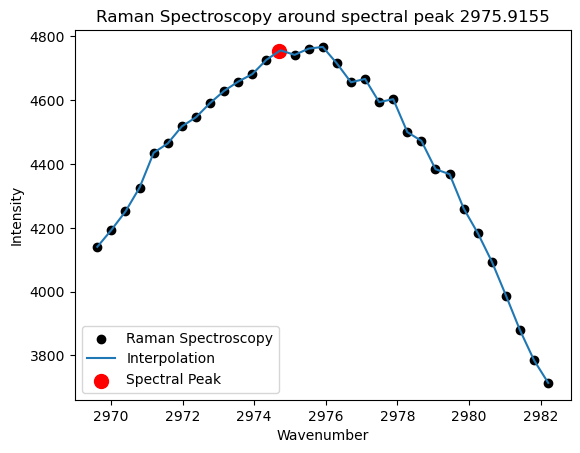

Peak Wavenumber: 1031.9002407035175


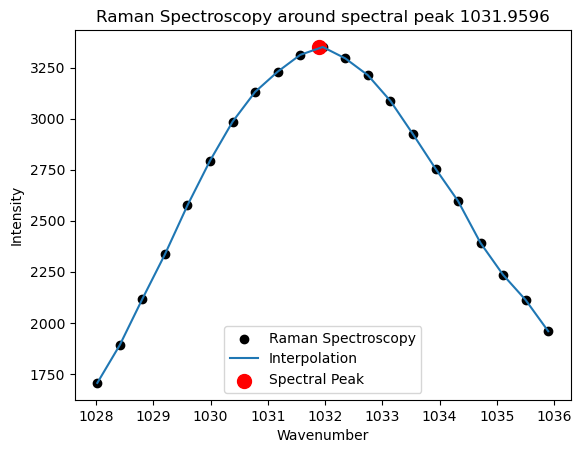

In [46]:
region_of_interest = 4

# Pick 4 largest peaks
sorted_indices = np.argsort(peak_intensity)[::-1][:region_of_interest]
top_peaks = peaks[sorted_indices]

# Initialize good_widths
good_widths = np.empty(region_of_interest)

def get_good_widths(peak):
    widths = np.arange(16, 0, -1)
    threshold = intensity[peak] * 0.5
    for width in widths:
        if intensity[peak] - intensity[peak - width] < threshold:
            return width

# Calculate good_width
for i in range(len(top_peaks)):
    good_widths[i] = get_good_widths(top_peaks[i])

# Process each region of interest
for j in range(region_of_interest):
    neighborhood = np.arange(top_peaks[j] - good_widths[j], top_peaks[j] + good_widths[j] + 1, dtype=np.int32)
    intensity_interpolate = CubicSpline(wavenumber[neighborhood], intensity[neighborhood])
    
    # Calculate the derivativeto find zero
    wavenumber_list = np.linspace(wavenumber[neighborhood[0]], wavenumber[neighborhood[-1]], num=200)
    derivative_list = np.gradient(intensity_interpolate(wavenumber_list), 0.02)
    
    # Calculate zero-crossings of the derivative to estimate wavenumbers with maximum intensity.
    zero_crossing_idx = np.where(np.diff(np.sign(derivative_list)))[0][0]
    peak_wavenumber = wavenumber_list[zero_crossing_idx]
    
    # Plot the results
    plt.figure()
    plt.scatter(wavenumber[neighborhood], intensity[neighborhood], color='black')
    plt.plot(wavenumber[neighborhood], intensity_interpolate(wavenumber[neighborhood]))
    plt.scatter(peak_wavenumber, intensity_interpolate(peak_wavenumber), color='red', s=100)
    
    print(f'Peak Wavenumber: {peak_wavenumber}')
    
    plt.xlabel('Wavenumber')
    plt.ylabel('Intensity')
    plt.title(f'Raman Spectroscopy around spectral peak {wavenumber[top_peaks[j]]}')
    plt.legend(['Raman Spectroscopy', 'Interpolation', 'Spectral Peak'])
    plt.show()
